In [1]:
# This tutorial shows how to import images into Python and then do some
# basic processing.
import numpy as np
import matplotlib.pyplot as plt

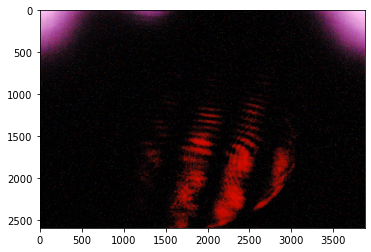

In [3]:
# Will will use the PIL module to import, manipulate, and save our images.
# First, we import the desired image and then display it.
from PIL import Image 
img = Image.open('30min.jpg')
plt.imshow(img);

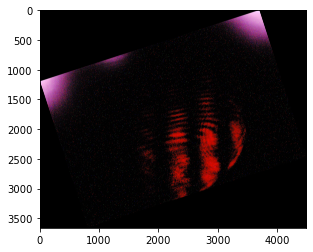

In [4]:
# Our particular image is of the interference pattern that results when a
# laser is passed through a Michelson interferometer.  Let's rotate the
# image such that the interference pattern is approximately vertical.  Use
# 'rotate()' and supply the rotation angle in degrees.
imgRotate = img.rotate(18, expand = 1)
plt.figure()
plt.imshow(imgRotate);

In [5]:
# We can crop the image to keep only the part that is showing the
# interference patern. First, use 'size' to get the height and width of the image.
# 'size' produces two outputs: the height and width.
width, height = imgRotate.size
print('Width:', width)
print('Height:', height)

Width: 4484
Height: 3662


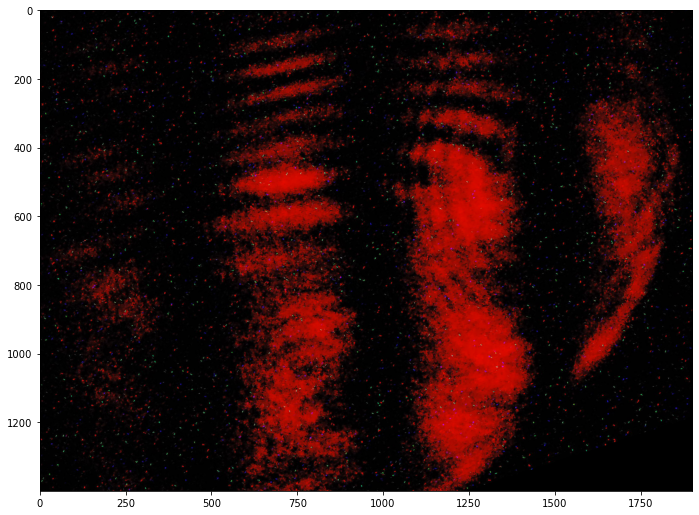

In [6]:
# The image can now be cropped using 'crop'.  You have to supply 'crop' with the 
# dimensions for cropping as list.  The list elements are: 
# (left boundary, top boundary, right boundary, bottom boundary)
imgCrop = imgRotate.crop((1600, 1600, 3500, 3000))
plt.figure(figsize=(12,8.84))
plt.imshow(imgCrop);

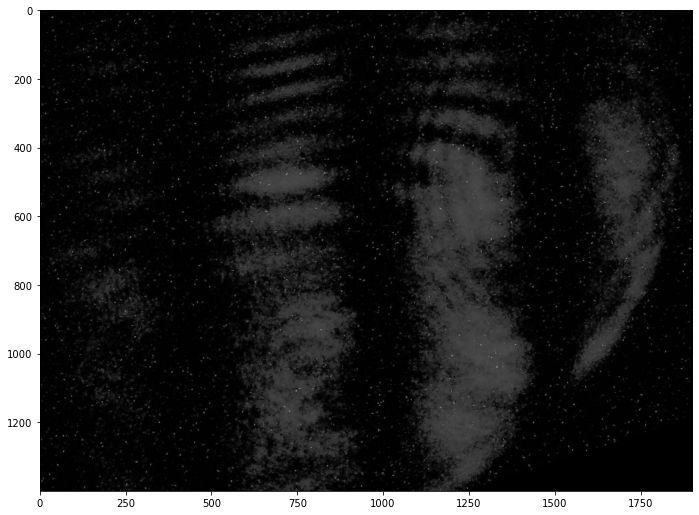

In [7]:
# Often, when analyzing an image, one may wish to convert the image colours
# to a gray scale.  To do so, use 'convert'.  I don't know what the option 'LA'
# means, but it is the option that generates the desired greyscale image. 
# This command assigns a value between 0 (black) and 255 (white) to each pixel 
# in the image.
imgGray = imgCrop.convert('LA')
plt.figure(figsize=(12,8.84))
plt.imshow(imgGray);

In [8]:
# We can use 'load' to get a map of the pixel values in the image.
pixelMap = imgGray.load()
print('The first element of pixelMap:', pixelMap[0, 0])

The first element of pixelMap: (4, 255)


In [9]:
# Each element of the map is a list of two values.  The first value is the 
# "brightness" of each pixel.  (The second element is always 255 for our
# greyscale image)
print('The brightness of the first pixel is:', pixelMap[0, 0][0])

The brightness of the first pixel is: 4


In [11]:
# We can improve the contrast of the image by reassigning values to each
# pixel in the map.  To do this, we first define a new image.
imgBW = Image.new( imgGray.mode, imgGray.size)
pixels = imgBW.load()

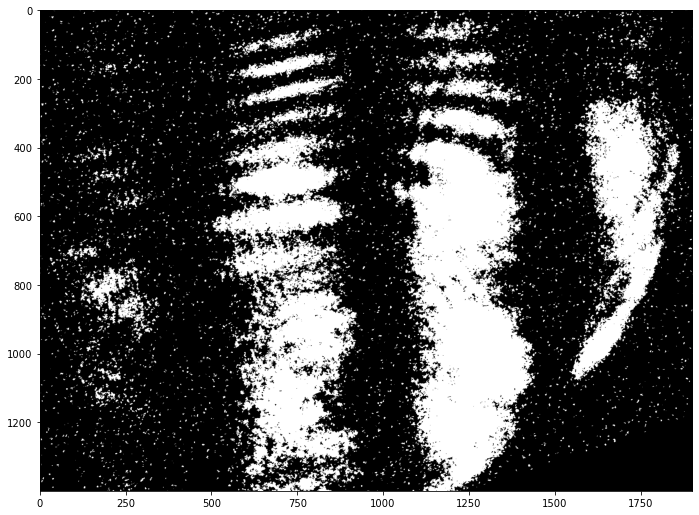

In [12]:
# We now loop over all of the rows and columns of the image.  We check the pixel
# map of the greyscale image and if brightness is greater than 20, we make the 
# corresponding pixel in the new image white (255).  If the brightness is less
# than 20, we make that pixel black (0) in the new image.   
width, height = imgGray.size
for i in range(width):
    for j in range(height):
        if pixelMap[i, j][0] > 20:
            pixels[i,j] = (255, 255)
        else:
            pixels[i,j] = (0, 255)
plt.figure(figsize=(12,8.84))
plt.imshow(imgBW);

In [13]:
# Let's try something fun.  Let's search the first grayscale image for very
# bright pixels and set those to zero.  This should remove the noisy white
# specs that appear outside of the interference pattern.  First, we create
# another new image.
imgEnhance = Image.new( imgGray.mode, imgGray.size)
pixels = imgEnhance.load()

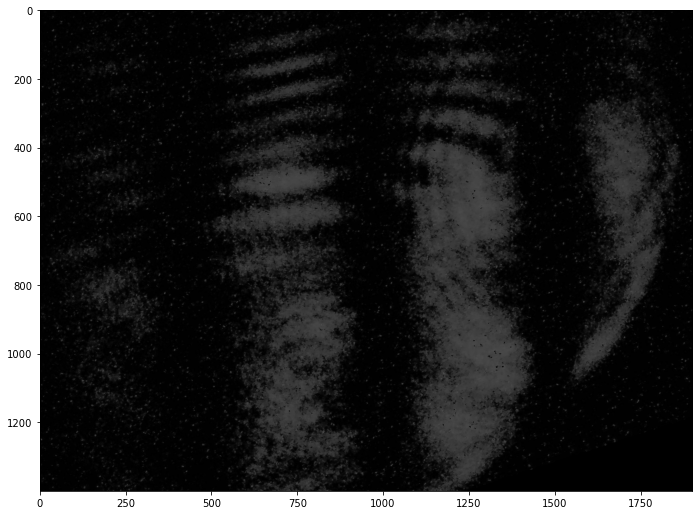

In [14]:
# This time pixels in the original greyscale image are turned black if the
# brightness is greater than 80.  Otherwise, we copy the pixel brightness from
# the original greyscale image.
width, height = imgGray.size
for i in range(width):        
    for j in range(height):   
        if pixelMap[i, j][0] > 80:
            pixels[i,j] = (0, 255)
        else:
            pixels[i,j] = pixelMap[i, j]
plt.figure(figsize=(12,8.84))
plt.imshow(imgEnhance);

In [15]:
# We can now do some other processing of the modified image.  For example,
# if, for some reason we wanted to, we could calculate the average intensity
# of the image.
tot = 0;
for i in range(width):
    for j in range(height):
        tot = tot + pixels[i, j][0]
avgInt = tot/(height*width)
print('The average intensity is', avgInt)

The average intensity is 14.676601503759398


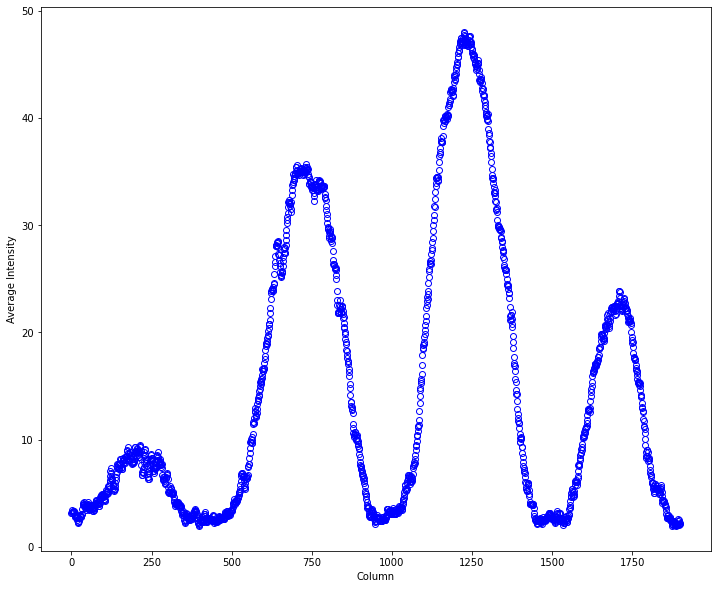

In [17]:
# Perhaps more interesting, we could try to find the average intensity of
# each column of pixels in the image.  This allows us to extract some 
# quantitative information from the image.
colAvg = []
colIndex = []
for i in range(width):
    tot = 0
    for j in range(height):
        tot = tot + pixels[i, j][0]
    colIndex = colIndex + [i]
    colAvg = colAvg + [tot/height]
plt.figure(figsize=(12,10))
plt.plot(colIndex, colAvg, 'bo', fillstyle = 'none')
plt.xlabel('Column')
plt.ylabel('Average Intensity');

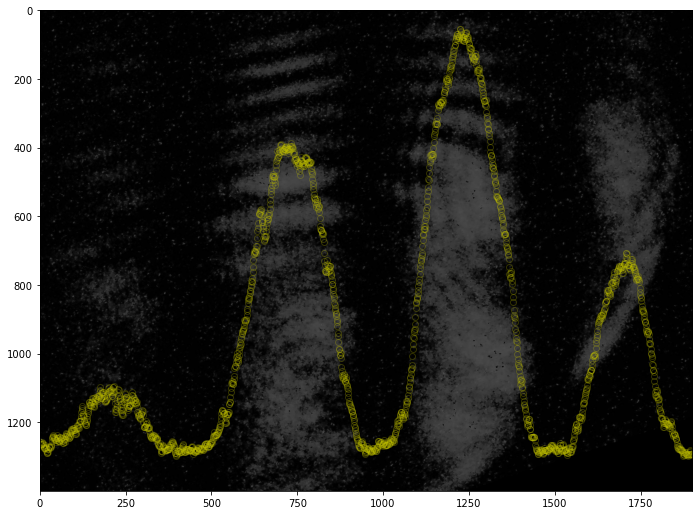

In [18]:
# We can even add the brightness plot on top of the "enhanced" greyscale image
# and then save that image as a jpeg file.  The alpha option in plt.plot()'
# set the transparency of the data points.
plt.figure(figsize=(12,8.84))
plt.imshow(imgEnhance)
plt.plot(colIndex, 1350 - np.array(colAvg)/(50)*1350, 'yo', fillstyle = 'none', alpha = 0.25)
plt.savefig('Jupyter enhancedInt.jpg', format='jpg') 

In [19]:
# We can also save the "enhanced" greyscale image as a jpeg.  For some reason,
# we need to convert it back to an RGB image first using 'convert'.
imgEnhance = imgEnhance.convert('RGB')
imgEnhance.save("Jupyter 30min-enhanced.jpg")